<a href="https://colab.research.google.com/github/Vashusingh44/cap-comp215/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LANGTON'S ANT

Contributors: Arshpreet Singh, Vashu Singh

In this notebook we have created a 2D animation of Langton's Ant. In first code block, we will import all the required imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib import animation
import random

The following plot_2d_array function is for plotting 2d Array using Matplotlib.

In [2]:
def plot_2d_array(array, axes=None, title='', cmap='Greys', **options):
    """
    Plot the 2D array as an image on the given axes  1's will be black, 0's will be white.

    :param axes: the axes to plot on, or None to use the `plt.gca()` (current axes)
    :param options: keyword arguments passed directly to `plt.imshow()`
           see https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html
    """
    axes = axes or plt.gca()  # If not axes are provided, draw on current axes
    axes.set_title(title)
    # Turn off axes labels and tick marks
    axes.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False ,
                     labelbottom=False, labeltop=False, labelleft=False, labelright=False,)
    # Defaults for displaying a "matrix" with hard-pixel boundaries and (0,0) at top-left
    options = {**dict(interpolation='nearest', origin='upper'), **options}
    axes.imshow(array, cmap=cmap, **options)

1. At a white square, turn 90° clockwise, flip the color of the square, move forward one unit

2. At a black square, turn 90° counter-clockwise, flip the color of the square, move forward one unit

In [3]:
class Animation2D:   #took this class from Lab___
    """
      Animates any 2D model with a step() method and a draw() method, using matplotlib
      model.step() should take no parameters - just step the model forward one step.
      model.draw() should take 2 parameters, the matpltolib axes to draw on and an integer step number
    """

    def __init__(self, model, frames=50, figsize=(8, 8)):
        """
        :param model: the simulation object to animate, with step() and draw(axes, step) methods
        :param frames: number of animation frames to generate
        """
        self.model = model
        self.frames = frames
        self.fig, self.ax = plt.subplots(figsize=figsize)

    def animation_step(self, step):
        """ Step the model forward and draw the plot """
        if step > 0:
            self.model.step()
        self.model.draw(self.ax, step=step)

    def show(self):
        """ return the matplotlib animation object, ready for display """
        anim = animation.FuncAnimation(self.fig, self.animation_step, frames=self.frames)
        plt.close()  # this ensures the last frame is not shown as a separate plot
        return anim

    def animate(self, interval=None):
        """ Animate the model simulation directly in the notebook display block """
        from IPython.display import clear_output
        try:
            for i in range(self.frames):
                clear_output(wait=True)  # clear the IPython display
                self.ax.clear()          # clear old image from the axes (fixes a performance issue)
                plt.figure(self.fig)     # add the figure back to pyplot
                self.animation_step(i)
                plt.show()               # show the current animation frame (pyplot then closes and throws away figure
                if interval:
                    time.sleep(interval)
        except KeyboardInterrupt:
            pass

In [4]:
class Ant:

  UP, RIGHT, DOWN, LEFT = 0, 1, 2, 3     # Directions for Ant

  def __init__(self, pos:list):
    self.pos = pos
    self.dir = random.choice([self.LEFT, self.UP, self.RIGHT, self.DOWN])


class Ant2D:

  WHITE = 0    # Ground color
  BLACK = 1    # Ground color

  def __init__(self, size, ants):
    ''' This function initializes the object by taking the size of ground and ant's initial direction as input '''
    self.ground = np.zeros((size,size), np.uint8)
    self.ants = ants


  def step(self):
    for ant in self.ants:
      if self.ground[ant.pos[0], ant.pos[1]] == self.WHITE:
        self.ground[ant.pos[0], ant.pos[1]] = self.BLACK
        ant.dir =  (ant.dir + 1)%4

      else :
        self.ground[ant.pos[0], ant.pos[1]] = self.WHITE
        ant.dir =  (ant.dir - 1)%4

      if ant.dir == ant.UP  :
          ant.pos[0] -= 1
      elif ant.dir == ant.RIGHT:
            ant.pos[1] += 1
      elif ant.dir == ant.DOWN:
            ant.pos[0] += 1
      elif ant.dir == ant.LEFT:
            ant.pos[1] -= 1

  def draw(self, axes=None, step=''):
     axes = axes or plt.gca()   # use pyplot's current axes if none are provided.
     plot_2d_array(self.ground, axes, title=f"Langton's Ant {step}")


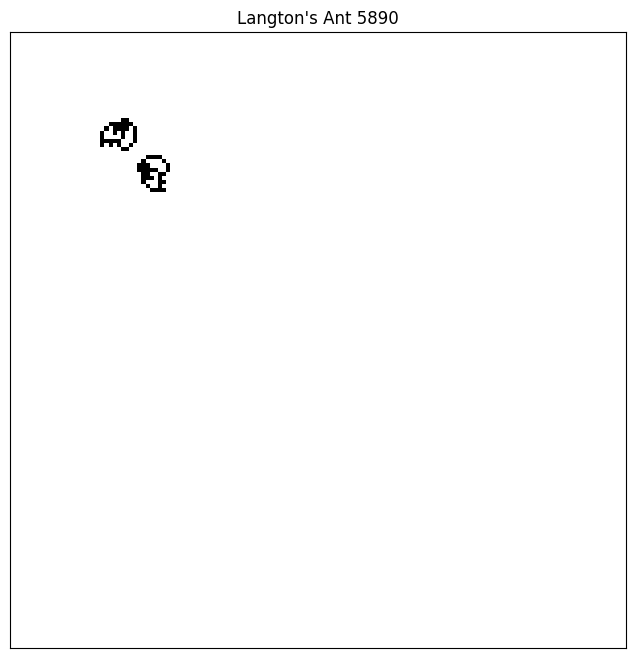

In [ ]:
# Sample usage
ant1 = Ant([25,25])  # Create an Ant object with initial position [25, 25]
ant2 = Ant([35,35])  # Create an Ant object with initial position [50, 50]

world = Ant2D(150,(ant2,ant1))

# Create an animation object
animm = Animation2D(world, frames=10000)

# Display the animation
animm.animate()


